<head>
<meta content="text/html; charset=ISO-8859-1"
http-equiv="content-type">
<title></title>
</head>
<body>
<p style="text-align: center;" class="MsoNormal"><span
style="font-weight: bold; text-decoration: underline;">STTP on Scientific Computing with Python: Image and Video Processing</span></p>
<p style="text-align: center;" class="MsoNormal">Image Processing using OpenCV<o:p></o:p></p>
<p style="text-align: center;" class="MsoNormal"><img alt="OpenCV"
src="https://a.fsdn.com/allura/p/opencvlibrary/icon" /><br>
<span style="font-weight: bold; text-decoration: underline;"></span><o:p></o:p></p>
<p class="MsoNormal"><br>
<o:p></o:p></p>
    <p style="text-align: center;" class="MsoNormal">STTP on Scientific Computing with Python<o:p></o:p></p>
<p class="MsoNormal"><o:p>&nbsp;</o:p></p>
<p style="text-align: center;" class="MsoNormal"><span
style="font-style: italic;">Michael George, RIT Kottayam</span><o:p></o:p></p>
<br>
<p class="MsoNormal"><o:p></o:p></p>
</body>


In [1]:
import cv2      #this makes OpenCV available

In [2]:
#check the version of OpenCV installed

<head>
<meta content="text/html; charset=ISO-8859-1"
http-equiv="content-type">
<title></title>
</head>
<body>
<p style="text-align: center;" class="MsoNormal"><img alt="OpenCV"
src="https://a.fsdn.com/allura/p/opencvlibrary/icon" /><br>
<p style="text-align: center;" class="MsoNormal">OpenCV -
Open Computer Vision Library<o:p></o:p></p>
<p class="MsoNormal"><o:p>&nbsp;</o:p></p><br><br>
<p class="MsoNormal">Vision, image &amp; video processing, and
machine learning libraries
rolled into one<o:p></o:p></p>
<p class="MsoNormal"><o:p>&nbsp;</o:p></p>
<p class="MsoNormal">Multiplatform and multilanguage<o:p></o:p></p>
<p class="MsoNormal"><o:p>&nbsp;</o:p></p>
<p class="MsoNormal">FREE and open source<o:p></o:p></p>
</body>

In [3]:
from numpy import *
from matplotlib.pyplot import *

OpenCV-Python requires only Numpy (in addition to other dependencies, which we will see later). We also use Matplotlib for some easy and nice plotting purposes (which I feel much better compared to OpenCV). Matplotlib is optional, but highly recommended

In [4]:
# utility for listing the contents of a directory or directories given to it via standard input. 
%ls

data/  IP.ipynb*  VP.ipynb*


In [5]:
# change directory to the folder where the data is present (if needed)
%cd data
#your command will be different depending on your setup


/media/michael/71C5B30E7B8EFF8E/STTP/Upload/data


In [6]:
#let's load a nice picture
bfly = imread('butterfly.jpg')
#don't forget to take advantage of tab-completion; it works for python syntax as well as filenames


In [7]:
#lets display the read image


In [8]:
#many algorithms operate on grayscale, and grayscale is easier to work on
bflygray = 


SyntaxError: invalid syntax (<ipython-input-8-41587b073b65>, line 2)

In [9]:
#display the grayscale image


In [10]:
#you may or may not want the default rainbow map


In [11]:
#let's make sure we understand our data


#the format above is (height, width, numchannels)
#if numchannels = 1, as is for grayscale, it is omitted
#for RGB/BGR/HSV color images, numchannels=3
#you could have numchannels=4
#this happens for RGBA (Red,Green,Blue,Alpha) images
#Alpha is transparency (0=transparent, 1 or 255 (depending on your datatype) = opaque)

In [12]:
#also remember how to get the data type


In [13]:
#uint8, which means integers in the 0-255 range, is standard for everyday camera images
#for scientific purposes, floating point is often used
#we typically want these in the 0-1 range


In [14]:
#get type of this new data


In [15]:
#going back to dimensions, how do we get the image width and height in convenient variables?
height, width = ?


SyntaxError: invalid syntax (<ipython-input-15-857182a81dcf>, line 2)

In [16]:
height, width


NameError: name 'height' is not defined

In [ ]:
#Notes:
#always remember that the y dimension comes first (just like in Matlab), hence height is before width
#when indexing, [0:2] is only 0 and 1, not 0,1,2
#Python uses a 0:N-1 convention, which is handy when you get used to it, but can trip up newcomers
#what would you expect the following to do?
print(arange(5))


In [17]:
#also, you might see something like this in people's code
height, width = 


SyntaxError: invalid syntax (<ipython-input-17-8449b9e96bbc>, line 2)

In [18]:
height, width


NameError: name 'height' is not defined

In [19]:
#works just the same; when you leave an index blank, it's assumed to be
#the first or last element, depending on whether it's on the left or right of the :


In [20]:
#also useful to know how to access the last, second to last etc elements



In [21]:
#you can probably guess how to extract RGB channels:



In [22]:
#note that these will all be singleton in the numchannels dimension



In [23]:
#how to recombine?
#first create a new blank image of the proper dimensions
combined = 
#be careful that the dimensions are given as a tuple rather than individual arguments


figure()
imshow(combined)


SyntaxError: invalid syntax (<ipython-input-23-cd9608984f5e>, line 3)

In [24]:
#it's easy to extract a region of interest from an image
#let's say we want to examine the butterfly's head more closely;
#we can get a bounding box from the figure above
bflyhead = 

figure()
imshow(bflyhead)


SyntaxError: invalid syntax (<ipython-input-24-9f22442e84bd>, line 4)

Suggested test-your-knowledge exercises:
1.  Take an image and write a big + sign over it (ie two blocks of black pixels; one extending from top to bottom, one from left to right, but not occupying the whole image)
2.  Create a function that will take in two images and return an image that combines them into a larger side-by-side image
Should be something like


In [25]:
def sidebyside(imageleft,imageright):
    newimheight=...
    newimwidth=...
    newim = zeros(...)
    ...
    ...
    ...
    return newim
#note this won't run as-is


 Pay attention to indentation!  Python requires code blocks to have consistent indentation (painful at first but makes for great code readability)

In [26]:
#numpy addition vs OpenCV addition
#numpy does modular addition
#ie 250+10 =4  (assuming uint8/mod255)
#OpenCV saturates
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y))
print(x+y)
#this tends to be what you want for combining images
#cv2.subtract works similarly
#of course, images will have to be the same dimension for addition/subtraction to work


[[255]]
[4]


In [27]:
cv2.addWeighted?

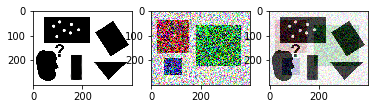

In [28]:
#image weighted blending
img1 = imread('pic1.png')
img2 = imread('pic2.png')
#alpha = 0.7, 0.3=1-0.7; make sure those values add to 1 
# if you want "conserve brightness"
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

figure()
subplot(1,3,1)
imshow(img1)
subplot(1,3,2)
imshow(img2)
subplot(1,3,3)
imshow(dst)






<br><br><br><br><br><br><br>
Image filtering in OpenCV

Lowpass filtering

In [29]:
help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .   
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .   
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are z

In [30]:
cv2.GaussianBlur?

Text(0.5, 1.0, 'Box-car blurred')

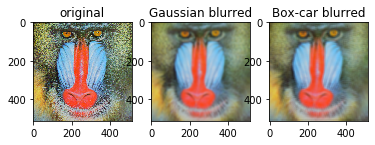

In [31]:
baboon = imread('baboon.jpg')
babblur = cv2.GaussianBlur(baboon,(29,29),0)

#custom kernel; simple box-car in this case
kernel = np.ones((15,15),np.float32)
kernel /= kernel.size #normalize kernel so as not to scale image intensity

babblur2 = cv2.filter2D(baboon,-1,kernel)

figure()
subplot(1,3,1)
imshow(baboon)
title('original')
subplot(1,3,2)
imshow(babblur)
title('Gaussian blurred')
subplot(1,3,3)
imshow(babblur2)
title('Box-car blurred')

#filter2D is very general and can do many different things; with the right kernel
#you can just as easily do high-pass filtering


Text(0.5, 1.0, 'cartoonified')

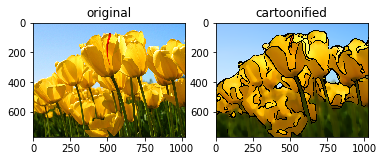

In [32]:
#fun demonstration of median-blur to "cartoonify" a real image
tulips = imread('Tulips.jpg')
tublur = cv2.medianBlur(tulips,29)


#we'll cover Canny edge detection and dilation shortly
edge=cv2.Canny(tublur,10,150)
kernel = np.ones((5,5),np.uint8)
edge = cv2.dilate(edge,kernel,iterations = 1)
tublur[edge==255]=0

figure()
subplot(1,2,1)
imshow(tulips)
title('original')
subplot(1,2,2)
imshow(tublur)
title('cartoonified')


Exercise:
Non-local means filtering is a powerful denoising method.  Read this
https://docs.opencv.org/4.4.0/d5/d69/tutorial_py_non_local_means.html
and try to use the code.

<b><br><br><br>Highpass filtering and edge-detection</b>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/%C3%84%C3%A4retuvastuse_n%C3%A4ide.png/500px-%C3%84%C3%A4retuvastuse_n%C3%A4ide.png">

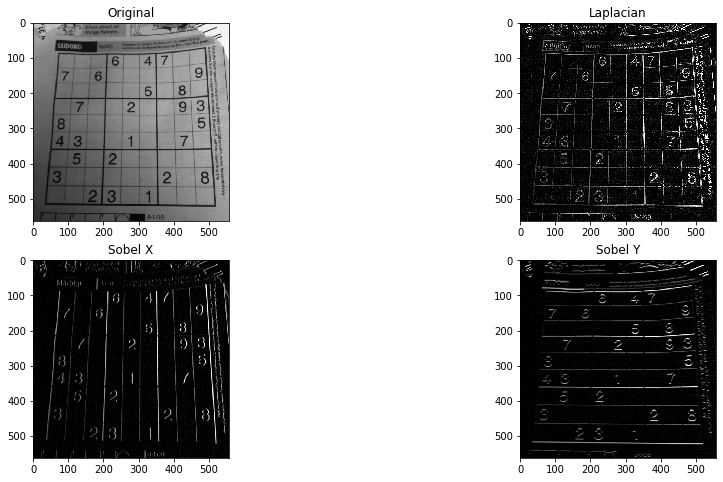

In [33]:
#basic high-pass filtering example;
#high-pass filtering responds to derivatives, or spatial changes in 
#images
img = cv2.imread('sudokubig.jpg',0)
 
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
figure(figsize=(16,8))
subplot(2,2,1),imshow(img,cmap = 'gray')
title('Original')
subplot(2,2,2),imshow(laplacian,cmap='gray')
title('Laplacian')
clim([0, 45])
subplot(2,2,3),imshow(sobelx,cmap='gray')
title('Sobel X')
clim([0, 4500])
subplot(2,2,4),imshow(sobely,cmap='gray')
title('Sobel Y')
clim([0, 4500])



Text(0.5, 1.0, 'Edge Image')

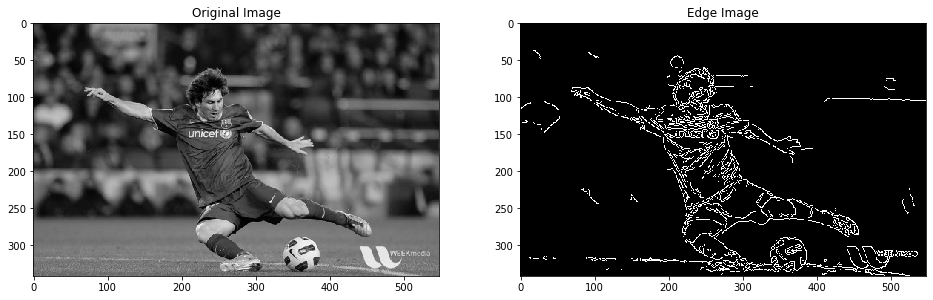

In [34]:
#Canny edge detection
#read about the theory here:
#https://docs.opencv.org/4.4.0/da/d22/tutorial_py_canny.html
    
img = cv2.imread('messi5.jpg',0) #note that the last 0 parameter converts the image to grayscale
edge=cv2.Canny(img,100,200)
 
figure(figsize=(16,8))
subplot(121),imshow(img,cmap = 'gray')
title('Original Image')
subplot(122),imshow(edge,cmap = 'gray')
title('Edge Image')


Morphological Operations:
<br>Modifying binary masks
<br>
Read about the different operations here <br>
https://docs.opencv.org/4.4.0/d9/d61/tutorial_py_morphological_ops.html#gsc.tab=0

Text(0.5, 1.0, 'flood-filled')

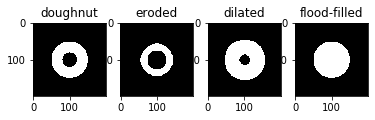

In [35]:
#create a doughnut/circle image/mask of 0's and 1's
yy=mgrid[-1:1:0.01,-1:1:0.01][0]
xx=yy.T
circ = 0*xx
circ [xx**2+yy**2 < 0.5**2 ]=1
circ [xx**2+yy**2 < 0.2**2 ]=0
 
#many different kernel types depending on application
#let's just stick with a simple box kernel
kernel = ones((10,10),float32)

#now let's try the some of the different morphological operations
erosion = cv2.erode(circ,kernel,iterations=1)

dilation = cv2.dilate(circ,kernel,iterations=1)

floodfilled = cv2.floodFill(image=circ.astype(uint8).copy(),mask=None,seedPoint=(100,100),newVal=1)
 
figure()
subplot(1,4,1)
imshow(circ,cmap='gray')
title('doughnut')
subplot(1,4,2)
imshow(erosion,cmap='gray')
title('eroded')
subplot(1,4,3)
imshow(dilation,cmap='gray')
title('dilated')
subplot(1,4,4)
imshow(floodfilled[1].astype(float32),cmap='gray')
title('flood-filled')

Adaptive Thresholding

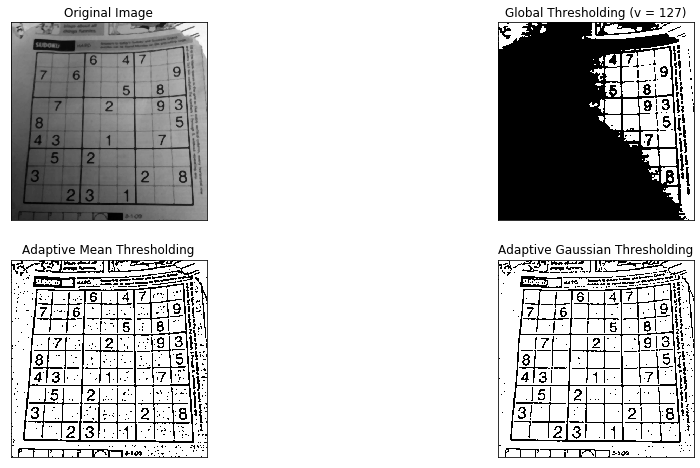

In [36]:
#compare hard thresholding to adaptive thresholding
img = cv2.imread('sudokubig.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

figure(figsize=(16,8))
for i in range(4):
    subplot(2,2,i+1),imshow(images[i],'gray')
    title(titles[i])
    xticks([]),yticks([])
    

In [37]:
#interactive widget example
#demonstrates multiple OpenCV functions, including DFT/FFT
#along with Weiner deconvolution
#https://en.wikipedia.org/wiki/Wiener_deconvolution

%pylab inline
#make sure to use "inline" instead of "notebook" when using widgets
import cv2
import sys
from ipywidgets import interact
rcParams['figure.figsize'] = (15.0, 12.0)

def blur_edge(img, d=31):
    h, w  = img.shape[:2]
    img_pad = cv2.copyMakeBorder(img, d, d, d, d, cv2.BORDER_WRAP)
    img_blur = cv2.GaussianBlur(img_pad, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
    y, x = np.indices((h, w))
    dist = np.dstack([x, w-x-1, y, h-y-1]).min(-1)
    w = np.minimum(np.float32(dist)/d, 1.0)
    return img*w + img_blur*(1-w)

def motion_kernel(angle, d, sz=65):
    kern = np.ones((1, d), np.float32)
    c, s = np.cos(angle), np.sin(angle)
    A = np.float32([[c, -s, 0], [s, c, 0]])
    sz2 = sz // 2
    A[:,2] = (sz2, sz2) - np.dot(A[:,:2], ((d-1)*0.5, 0))
    kern = cv2.warpAffine(kern, A, (sz, sz), flags=cv2.INTER_CUBIC)
    return kern


def update(angle,d,noise):

    noise = 10**(-0.1*noise)
    ang = deg2rad(angle)

    psf = motion_kernel(ang, d)


    psf /= psf.sum()
    psf_pad = np.zeros_like(img)
    kh, kw = psf.shape
    psf_pad[:kh, :kw] = psf
    PSF = cv2.dft(psf_pad, flags=cv2.DFT_COMPLEX_OUTPUT, nonzeroRows = kh)
    PSF2 = (PSF**2).sum(-1)
    iPSF = PSF / (PSF2 + noise)[...,np.newaxis]
    RES = cv2.mulSpectrums(IMG, iPSF, 0)
    res = cv2.idft(RES, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT )
    res = np.roll(res, -kh//2, 0)
    res = np.roll(res, -kw//2, 1)

    subplot(1,2,1)
    imshow(psf,cmap='gray')
    subplot(1,2,2)
    imshow(res,cmap='gray')


fn = 'licenseplate_motion.jpg'

img = cv2.imread(fn, 0)
if img is None:
    print('failed to load img')

img = np.float32(img)/255.0

img = blur_edge(img)
IMG = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)


interact(update,angle=(0.0,180,1),d=(0,50,1),noise=(0.0,50,1))



Populating the interactive namespace from numpy and matplotlib


/media/michael/71C5B30E7B8EFF8E/anaconda3/envs/sttp/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


interactive(children=(FloatSlider(value=90.0, description='angle', max=180.0, step=1.0), IntSlider(value=25, d…

<function __main__.update(angle, d, noise)>

Suggested exercise:<br>
Make a script that let's you do hard-thresholding with a slider-controlled threshold level and view the result.
Do similarly for blurring methods.

<br><br><br><br><br><br><br><br><br><br>Image Segmentation

What is image segmentation?

Partitioning an image into regions of interest (example: in a picture of a human face, finding
which pixels are the human and which are the background)

Goal:  Try to find boundaries around related/similar (in color, texture etc) pixels

In [38]:
import cv2          #this makes OpenCV available
from numpy import *
from matplotlib.pyplot import *

#also make sure to call show() in order to display plots


<b>Watershed algorithm</b>
<br>
http://cmm.ensmp.fr/~beucher/wtshed.html
<br>
<img src="http://cmm.ensmp.fr/~beucher/lpe1.gif">

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe82c4b9050>,
 Text(0.5, 1.0, 'Segmented'),
 <matplotlib.colorbar.Colorbar at 0x7fe82c142290>)

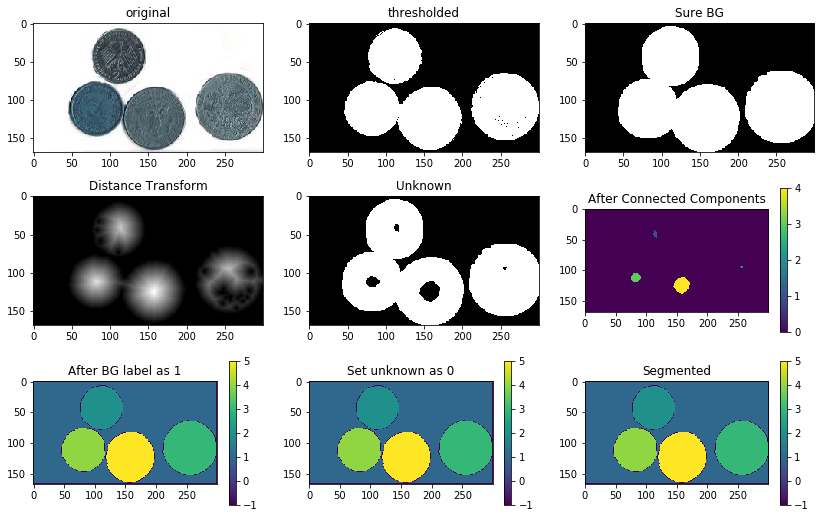

In [39]:
img = cv2.imread('coinsb.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers0 = markers

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
markers1 = markers


# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers2 = markers

markers = cv2.watershed(img,markers)
# img[markers == -1] = [255,0,0]

figure(figsize=(14,9))

subplot(3,3,1), imshow(img), title('original')

subplot(3,3,2), imshow(thresh,cmap='gray'), title('thresholded')

subplot(3,3,3), imshow(sure_bg,cmap='gray'), title('Sure BG')

subplot(3,3,4), imshow(dist_transform,cmap='gray'), title('Distance Transform')

subplot(3,3,5), imshow(unknown,cmap='gray'), title('Unknown')

subplot(3,3,6), imshow(markers0), title('After Connected Components'),colorbar()

subplot(3,3,7), imshow(markers1), title('After BG label as 1'),colorbar()

subplot(3,3,8), imshow(markers2), title('Set unknown as 0'),colorbar()

subplot(3,3,9), imshow(markers), title('Segmented'),colorbar()



In [40]:
cv2.connectedComponents?

In [41]:
cv2.distanceTransform?

<br><br><br>Image Transformations

<b>Resizing</b>

Text(0.5, 1.0, 'original                                                        scaled')

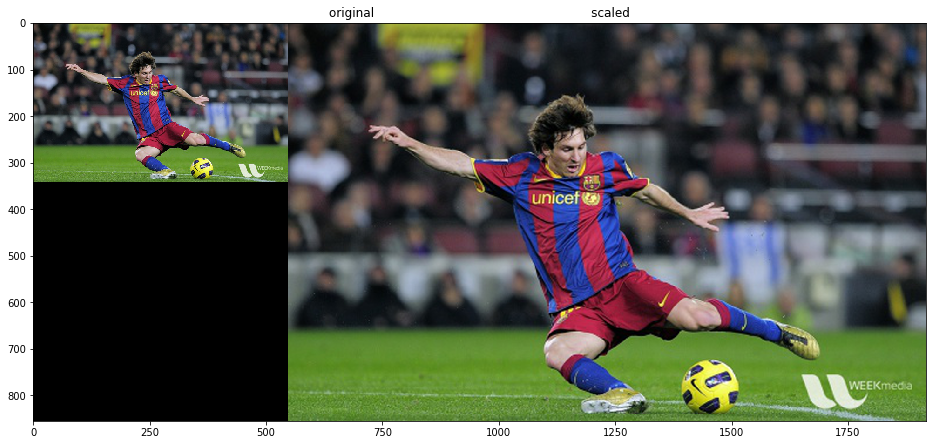

In [42]:
scalefactor=2.5

img = imread('messi5.jpg')

#the heart of the code:
res = cv2.resize(img,None,fx=scalefactor, fy=scalefactor, interpolation = cv2.INTER_CUBIC)

#the remainder of the code is to generate the display image
height, width = img.shape[:2]

bigwidth = int( amax( [scalefactor*height , height]) )
bigheight = int( width*(1+scalefactor))

bigim = zeros((bigwidth , bigheight ,3),uint8)
bigim[:height,:width] = img

if scalefactor > 1:
    bigim[:,width:] = res
else:
    bigim[: int(scalefactor*height),width:] = res

figure(figsize = (16,8))
imshow(bigim)
title('original                                                        scaled')


<b>Affine Transformation</b>
<br>
https://docs.opencv.org/4.4.0/d4/d61/tutorial_warp_affine.html

<br><br><b>Translation</b>

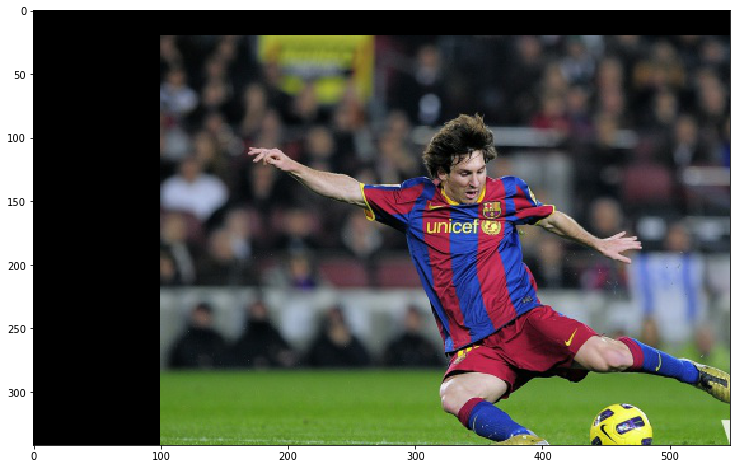

In [43]:

img = imread('messi5.jpg')
rows,cols,chans = img.shape

xshift=100
yshift=20

M = np.float32([[1,0,xshift],[0,1,yshift]])
dst = cv2.warpAffine(img,M,(cols,rows))

figure(figsize = (16,8))
imshow(dst)


<br><br><b>Rotation</br>
<br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/fe4ee3f1ce8e028da5bd4219c9dc7fc2216543e4">

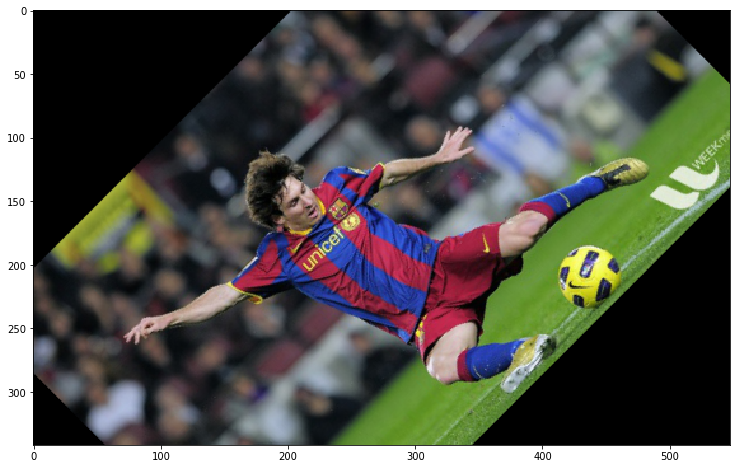

In [44]:
img = imread('messi5.jpg')
rows,cols, chans = img.shape

#specify our rotation in degrees
theta = 45.0

M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,1) 
dst = cv2.warpAffine(img,M,(cols,rows))
                 
figure(figsize = (16,8))
imshow(dst)                 


<br><br><b>General affine transform:</b><br><br>
Map 3 input (x,y) points to 3 output points
ie parallelogram to parallelogram
Will perform translation, scaling, rotation, and skew, but not perspective correction

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe842059b10>,
 Text(0.5, 1.0, 'Output'))

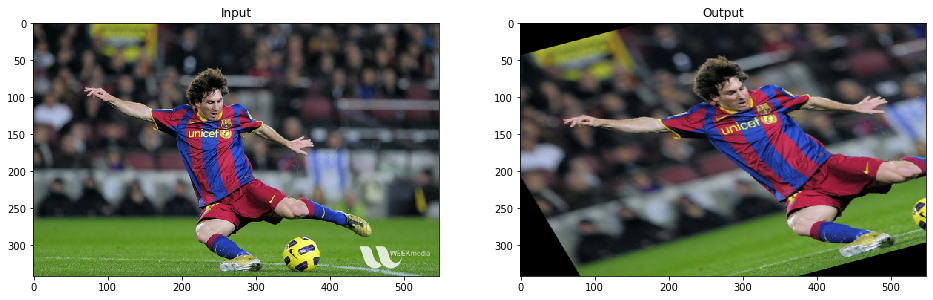

In [45]:
img = imread('messi5.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

figure(figsize = (16,8))
subplot(121),imshow(img),title('Input')
subplot(122),imshow(dst),title('Output')



<br><br><b>Perspective transform:</b><br><br>
4 point transform
<br>Nonlinear but more general than affine
<br>Perspective:  further away objects look smaller
<br> https://caligari.dartmouth.edu/doc/ibmcxx/en_US/doc/ioc/tasks/t2g2tpmt.htm

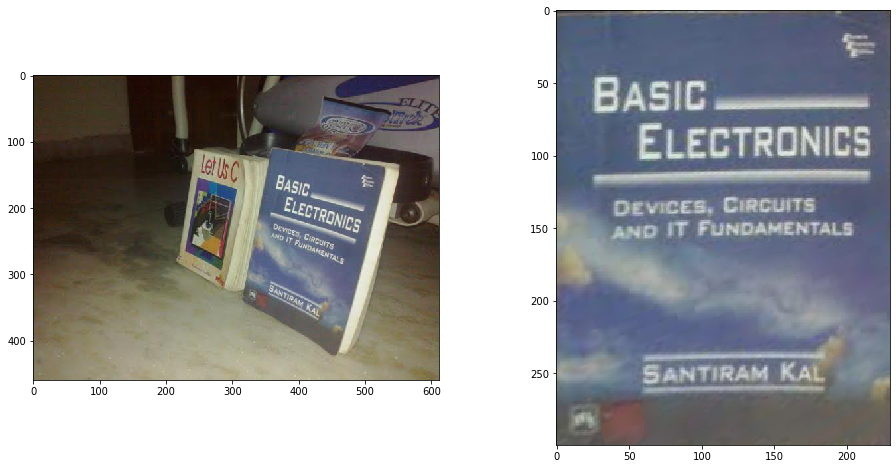

In [46]:
img = imread('right.jpg')
rows,cols,chans = img.shape

startpts =  float32([[362, 107], [530,139] , [453,416], [319,337]])
endpts   =  float32([[100, 100], [330,100],  [330,400], [100,400]])

M = cv2.getPerspectiveTransform(startpts,endpts)

dst = cv2.warpPerspective(img,M,(rows,cols))

figure(figsize = (16,8))
subplot(1,2,1)
imshow(img)
subplot(1,2,2)
imshow(dst[100:400,100:330])


<br><br><br>Finding objects

Template matching:
    
    Use an example (template) image (smaller than main image), slide it over the main image, and see where the correlation is strongest
    
    Can be used to determine if an object is present, and if so, where

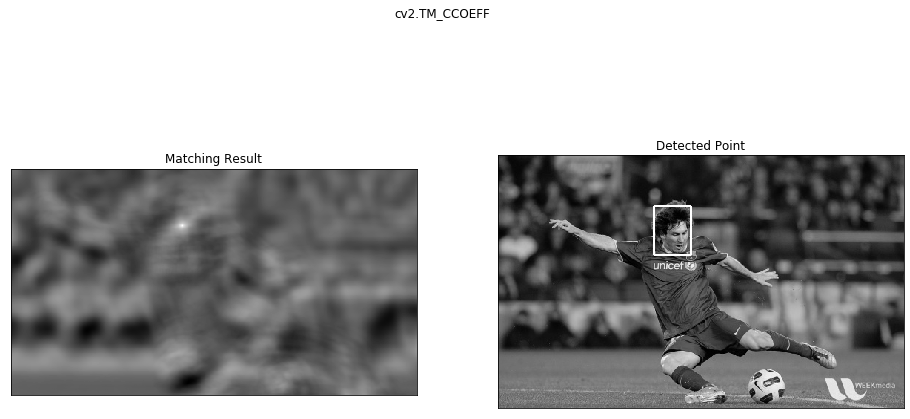

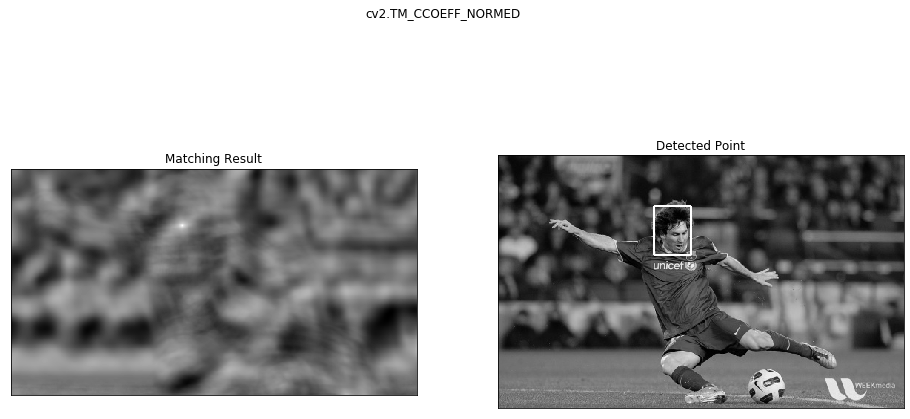

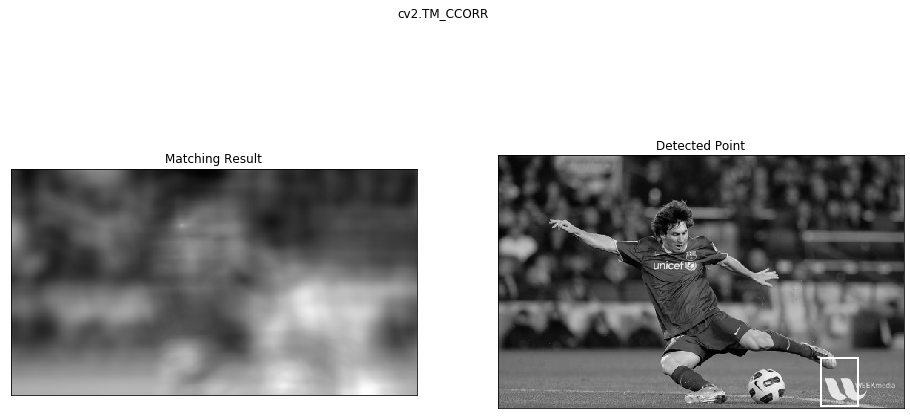

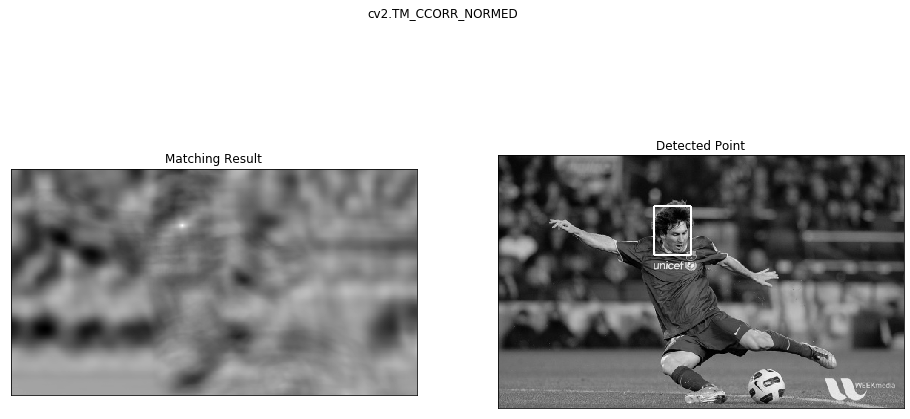

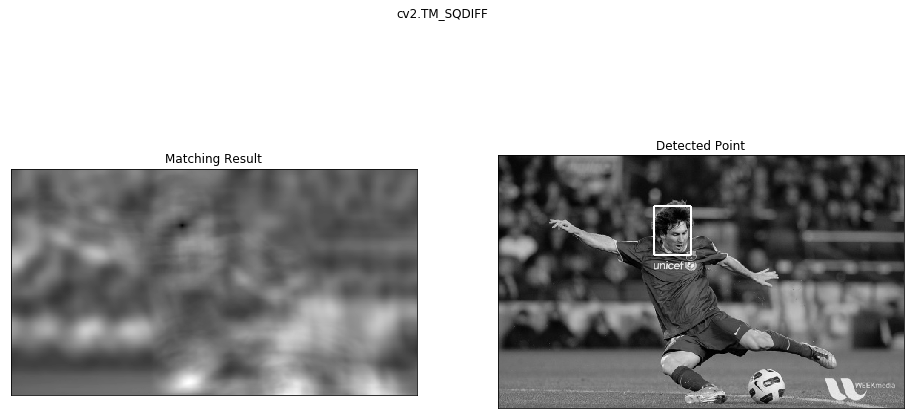

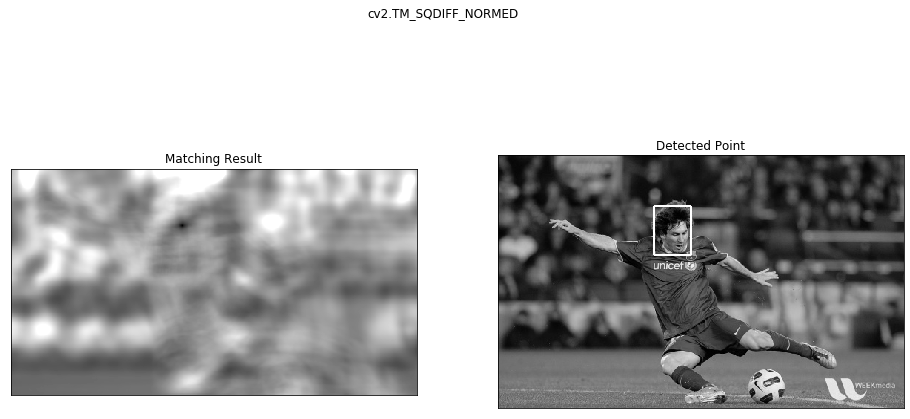

In [47]:
#template example with various cross-correlation metrics

img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = img[70:135,210:260]
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    figure(figsize = (16,8))
    subplot(121)
    imshow(res,cmap = 'gray')
    title('Matching Result')
    xticks([])
    yticks([])
    subplot(122),
    imshow(img,cmap = 'gray')
    title('Detected Point')
    xticks([])
    yticks([])
    suptitle(meth)


<br><br><br>Finding lines and circles with the Hough Transform

Hough transform: Take an edge-detection, binarized image;<br>
Consider curves which can be parameterized (lines, for example, have angle and offset parameters);<br>
For a given set of parameters, see how many points in the image fall on the curve<br>
If #points > threshold, that curve exists in the image<br>
https://docs.opencv.org/4.4.0/d6/d10/tutorial_py_houghlines.html

<img src="http://docs.opencv.org/3.1.0/houghlinesdemo.gif">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Hough-example-result-en.png/800px-Hough-example-result-en.png">

Text(0.5, 1.0, 'marked with Hough features')

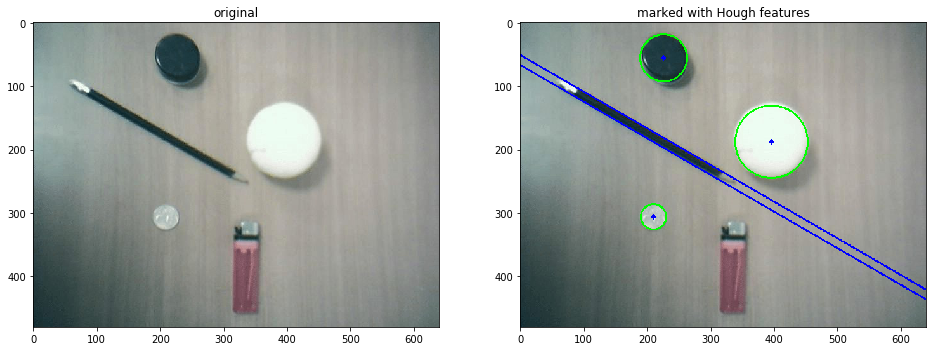

In [48]:
#Hough line and circle example

img = imread('stuff.jpg')
imgorg = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

#heart of the code:
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,2*pi/180,100)

circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,200, param1=150,param2=30,minRadius=0,maxRadius=0)


#the rest of the code is for display
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)


figure(figsize=(16,8))
subplot(1,2,1)
title('original')
imshow(imgorg)
subplot(1,2,2)
imshow(img)
title('marked with Hough features')


<br><br><br>Features

What are image features?
<br>
"specific patterns or specific features which are unique, which can be easily tracked, which can be easily compared."<br>
https://docs.opencv.org/4.4.0/df/d54/tutorial_py_features_meaning.html

<b>Corners:</b>
<br>Algorithms exist to find corner points in images
<br>Very handy for objects with sharp edges


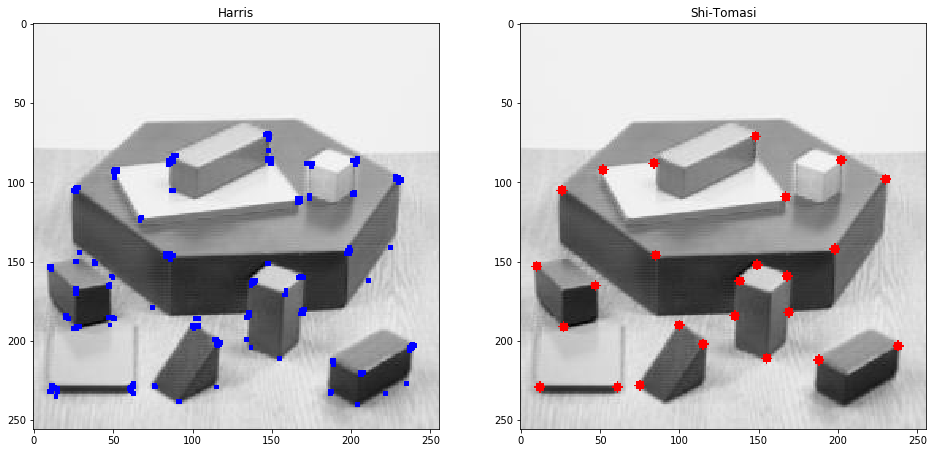

In [49]:
img = imread('blox.jpg')
img2 = img.copy()
img3 = img.copy()
gray = float32(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))


#######Method 1: Harris corners
dst = cv2.cornerHarris(gray,2,3,0.04)
#display code
dst = cv2.dilate(dst,None)
img3[dst>0.01*dst.max()]=[0,0,255]
#####################



#######Method 2 Shi-Tomasi corners, AKA "good features to track"
corners = int0(cv2.goodFeaturesToTrack(gray,25,0.01,10))
#display code
for i in corners:
    x,y = i.ravel()
    cv2.circle(img2,(x,y),3,255,-1)
###################



figure(figsize=(16,8))
subplot(121)
title('Harris')
imshow(img3)
subplot(122)
title('Shi-Tomasi')
imshow(img2)

Suggested exercise:<br>
Find or create an image that contains a rectangular object captured at an angle against a flat, high-contrast background.  Write a script that finds the corners and then performs a perspective transform to bring the object into head-on view.

<b>Widely used general features:</b><br>
<br>SIFT: Scale Invariant Feature Transfrom
<br>SURF: Speeded Up Robust Features
<br>BRISK: Binary Robust Invariant Scalable Keypoints
<br>HOG: Histogram of oriented Gradients
<br>BRIEF: Binary Robust Independent Elementary Features
<br>ORB: Oriented fast and Rotated BRIEF
<br>AKAZE: AKAZE (no acronym)

<br>Exercise:  Read about these different features on Wikipedia and https://docs.opencv.org/4.4.0/db/d27/tutorial_py_table_of_contents_feature2d.html

<br><br><br>Feature-matching/homography demo

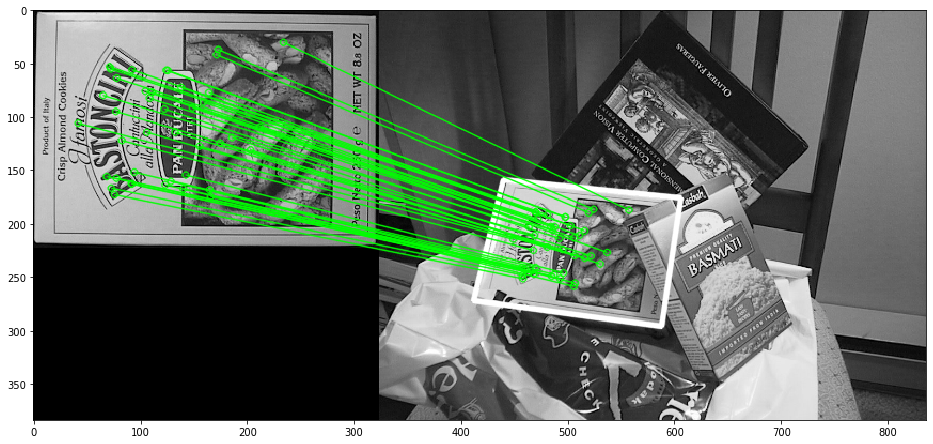

In [50]:
MIN_MATCH_COUNT = 10 #make sure we have at least 10 points to compare/match

img1 = cv2.imread('box.png',0)          # query image
img2 = cv2.imread('box_in_scene.png',0) # main image

# Initiate  detector

###uncomment one of these
#detector = cv2.xfeatures2d.SIFT_create(); norm = cv2.NORM_L2 # sift and surf are proprietary, not free and open source

#detector = cv2.xfeatures2d.SURF_create(800); norm = cv2.NORM_L2

# detector = cv2.ORB_create(400); norm = cv2.NORM_HAMMING

# detector = cv2.AKAZE_create(); norm = cv2.NORM_HAMMING

detector = cv2.BRISK_create(); norm = cv2.NORM_HAMMING


# find the keypoints and descriptors with chosen detector
kp1, des1 = detector.detectAndCompute(img1,None)
kp2, des2 = detector.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

#we've found the points, now we need to find matching pairs
matcher =  cv2.BFMatcher(norm) #BF = brute force
#Flann matcher can be more efficient but also more tempermental

#find the matches
matches = matcher.knnMatch(des1,trainDescriptors=des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None


draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

figure(figsize=(16,8))
imshow(img3, 'gray')
